# **Trabalho Prático 4 - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Aluno 1:** Giovanna Paranhos
### **Matrícula 1:** 2023655476
### **Aluno 2:** Samir Saliba
### **Matrícula 1:** 2022685118

### **Tema:** Regressão com dados de "Demanda de aluguel de bicicletas na cidade de Seoul"
### **Base de dados:** [UCI - Seoul Bike Sharing Demand](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)

In [1]:
import pandas as pd

df = pd.read_csv('data_tp4/SeoulBikeData.csv', encoding='unicode_escape')
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

## **1. Business Understanding**

Link para a sessão: [OpenAI](https://chat.openai.com/share/6b1d3be9-088d-4d6f-89ba-b34ea24ed884)

Business Understanding in CRISP-DM for the bike rental demand prediction task in Seoul:

#### Objective:
The primary objective of this data mining project is to predict the demand for bike rentals in the city of Seoul based on various features related to the day and weather conditions. The goal is to provide valuable insights to bike rental service providers, city planners, and other stakeholders to optimize resource allocation, enhance user experience, and make informed decisions.

#### Key Stakeholders:
1. **Bike Rental Service Providers:** The primary users of the predictions would be the bike rental companies operating in Seoul. They are interested in understanding the patterns of bike demand to optimize their inventory, maintenance schedules, and marketing strategies.

2. **City Planners and Administrators:** City planners and administrators aim to use the predictions to enhance urban mobility and sustainability. By understanding the factors influencing bike rental demand, they can make data-driven decisions related to infrastructure development, traffic management, and public transportation planning.

3. **Users and Commuters:** The general public who use bike rental services are indirect stakeholders. Accurate predictions can improve user experience by ensuring the availability of bikes when and where they are needed, leading to increased satisfaction and usage.

#### Data Mining Problem Definition:
The problem is formulated as a regression task where the goal is to predict the number of bike rentals (Rented Bike Count) based on the given features for a given day and time. The features include temporal information (Date, Hour, Seasons), weather conditions (Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar Radiation, Rainfall, Snowfall), and contextual information (Holiday, Functioning Day).

#### Preliminary Plan:
1. **Data Exploration:** Explore the dataset to understand the distribution of variables, identify any outliers, and gain insights into the relationships between features and the target variable (Rented Bike Count).

2. **Data Cleaning and Preprocessing:** Handle missing values, outliers, and ensure data quality. Convert categorical variables like 'Seasons' and 'Holiday' into numerical representations if needed. Standardize or normalize numerical features if required.

3. **Feature Engineering:** Create additional relevant features if necessary. For example, derive new features from date and time information, such as day of the week or month.

4. **Model Selection:** Choose regression models suitable for predicting bike rental counts, such as linear regression, decision trees, or ensemble methods. Consider time-based splitting for training and testing datasets to account for temporal dependencies.

5. **Model Training and Evaluation:** Train the selected models on the training set and evaluate their performance using appropriate metrics (e.g., Mean Squared Error, R-squared) on the test set.

6. **Deployment:** Once a satisfactory model is identified, deploy it for making predictions on new data. Provide recommendations and insights based on the model's findings.

7. **Monitoring and Maintenance:** Regularly monitor the model's performance and update it as needed. Ensure that the predictions remain accurate and relevant as conditions in the city change over time.

By addressing these steps, the project aims to deliver a predictive model that adds value to bike rental services and contributes to more efficient urban transportation planning in Seoul.

## **2. Data understanding (Entendimento dos dados)**

Link para a sessão: [OpenAI](https://chat.openai.com/share/4cac4950-a79e-4dd2-ab47-3b40190271ed)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

################## Linhas abaixo comentadas pois não fazem sentido no contexto atual
# # Load the dataset
# url = "your_dataset_url_here.csv"  # Replace with your actual dataset URL or file path
# df = pd.read_csv(url)

# # Display basic information about the dataset
# df.info()

In [4]:
# Display the first few rows of the dataset
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Summary statistics for numerical columns
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [6]:
# Check for missing values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

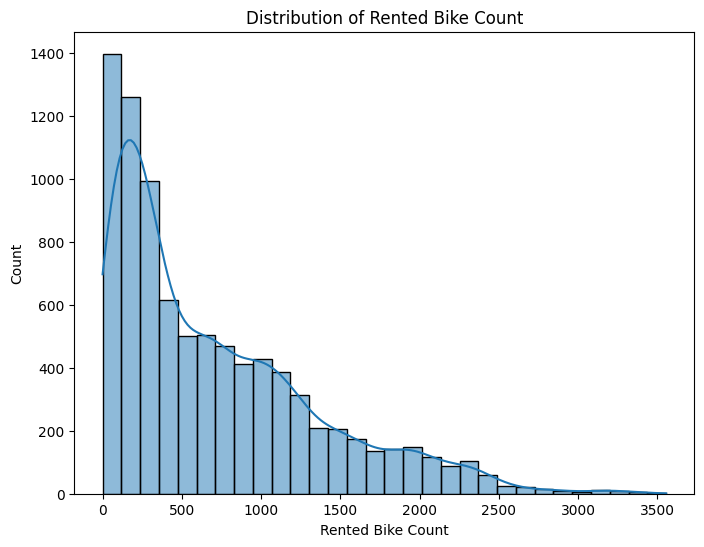

In [7]:
# Visualize the distribution of the target variable (Rented Bike Count)
plt.figure(figsize=(8, 6))
sns.histplot(df['Rented Bike Count'], bins=30, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.show()

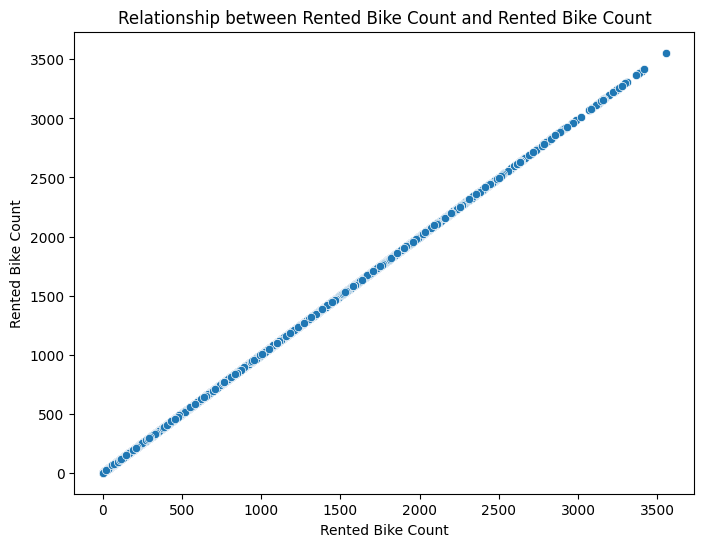

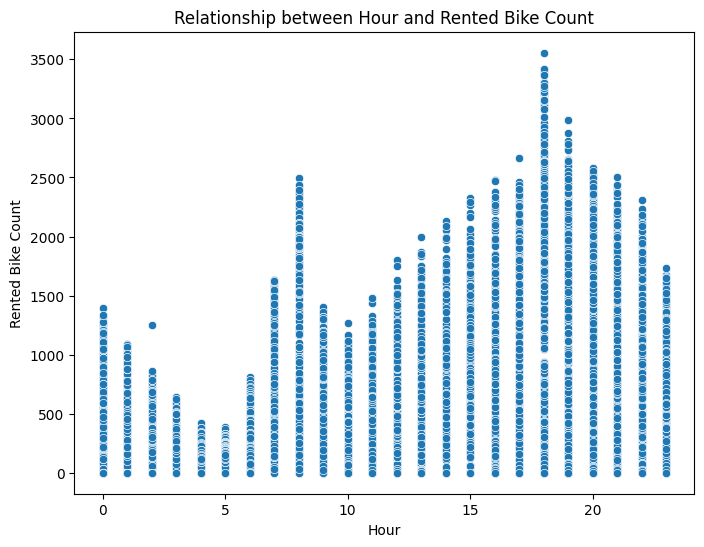

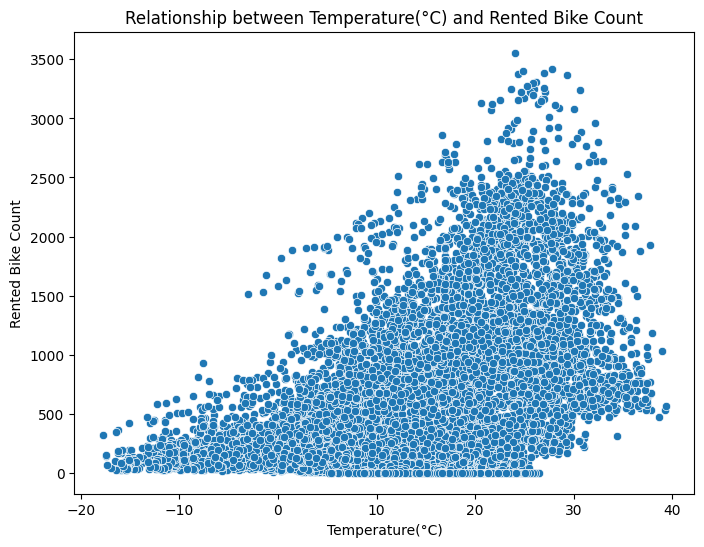

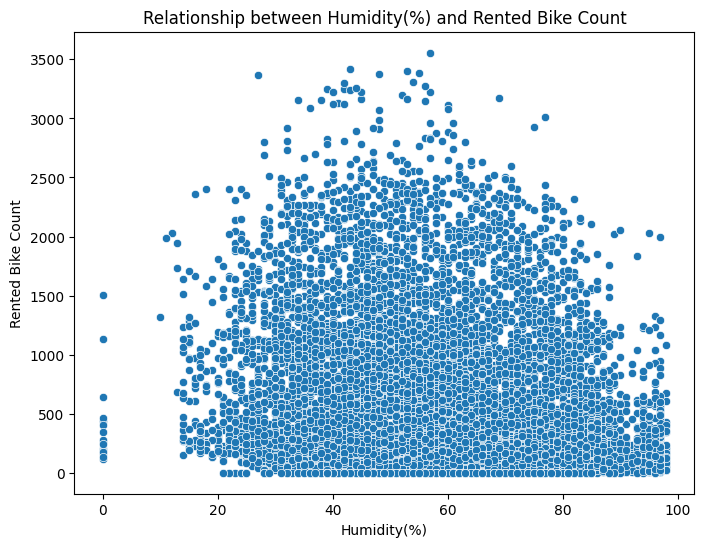

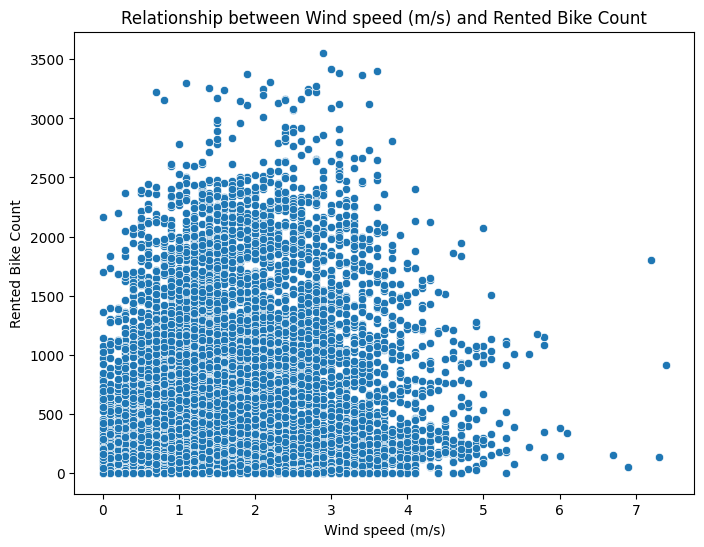

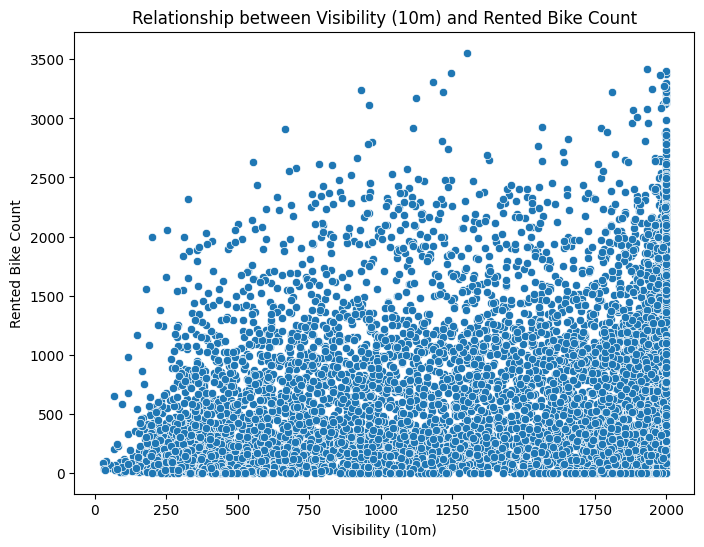

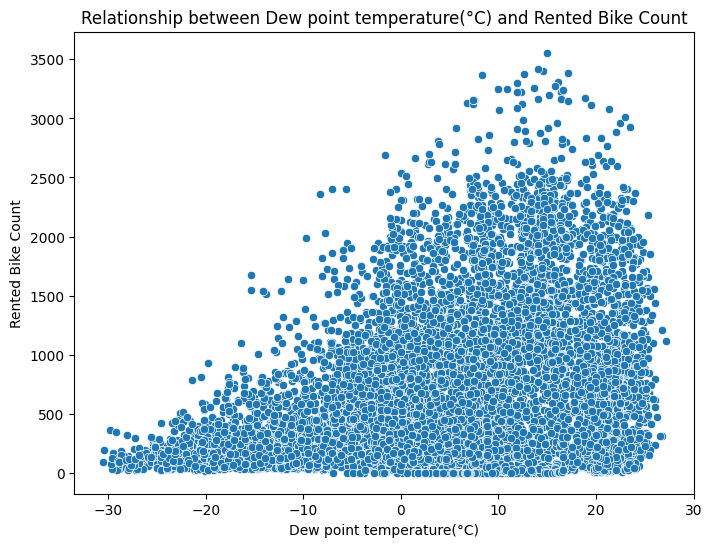

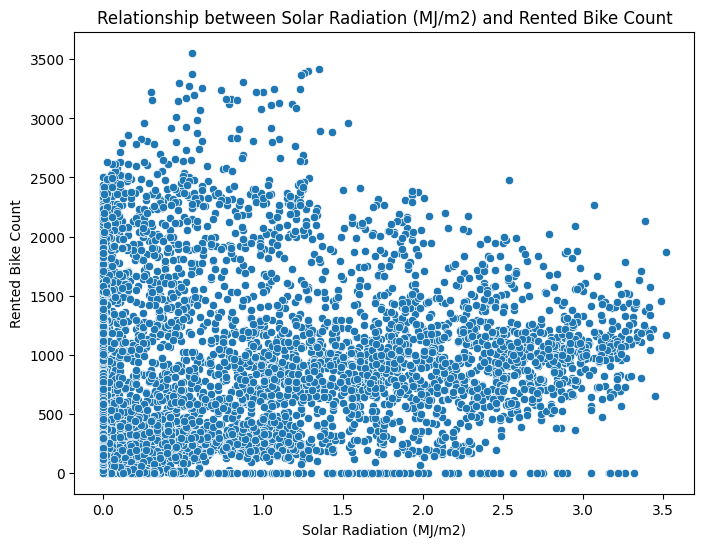

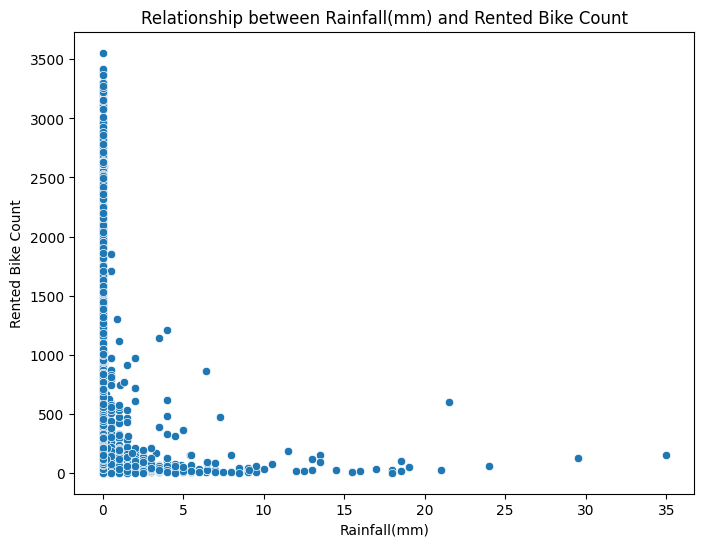

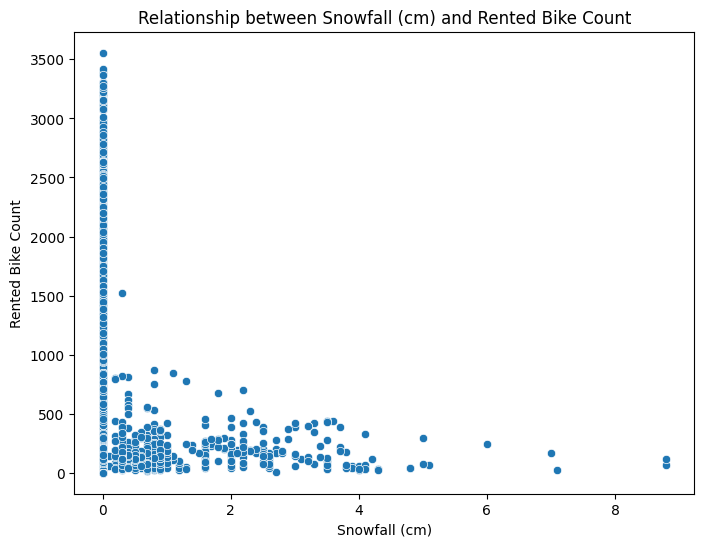

In [8]:
# Visualize the relationships between numerical features and the target variable
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='Rented Bike Count', data=df)
    plt.title(f'Relationship between {feature} and Rented Bike Count')
    plt.show()


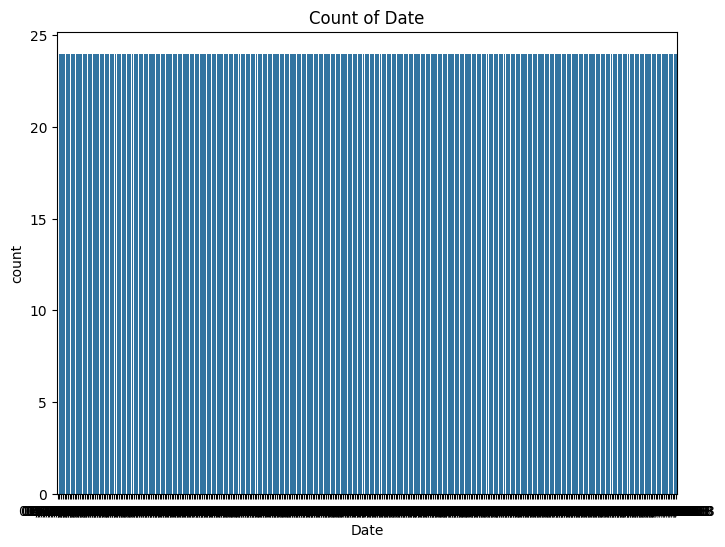

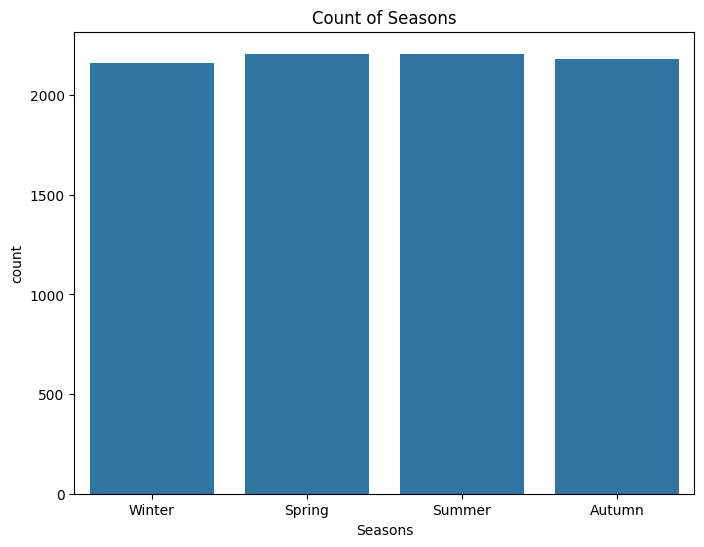

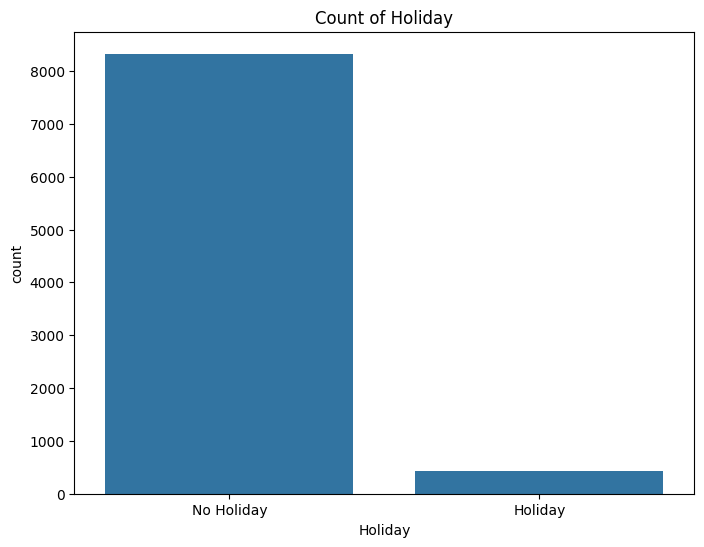

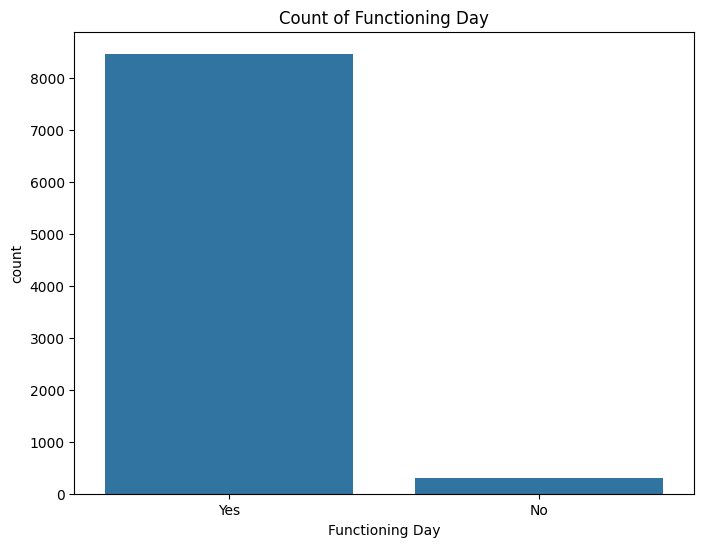

In [9]:
# Visualize categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.show()

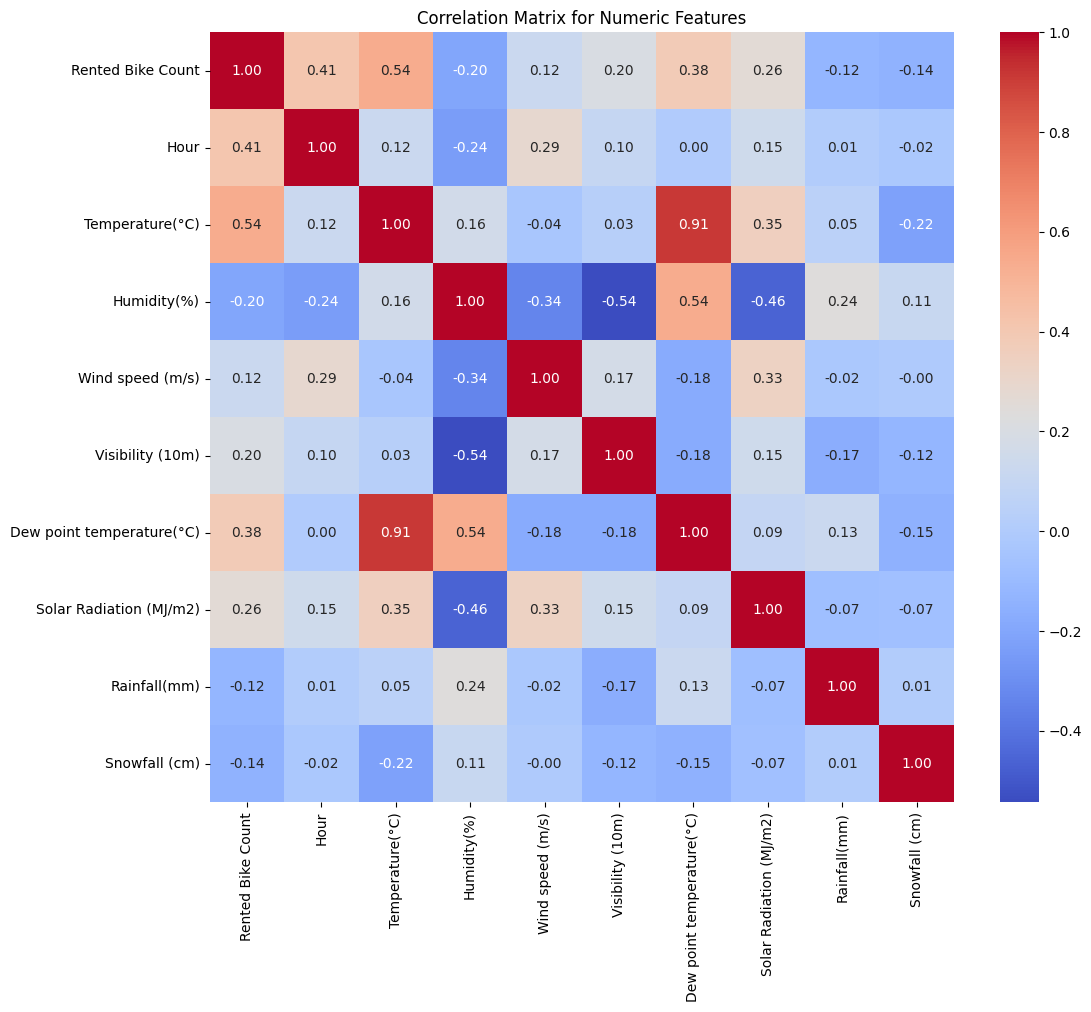

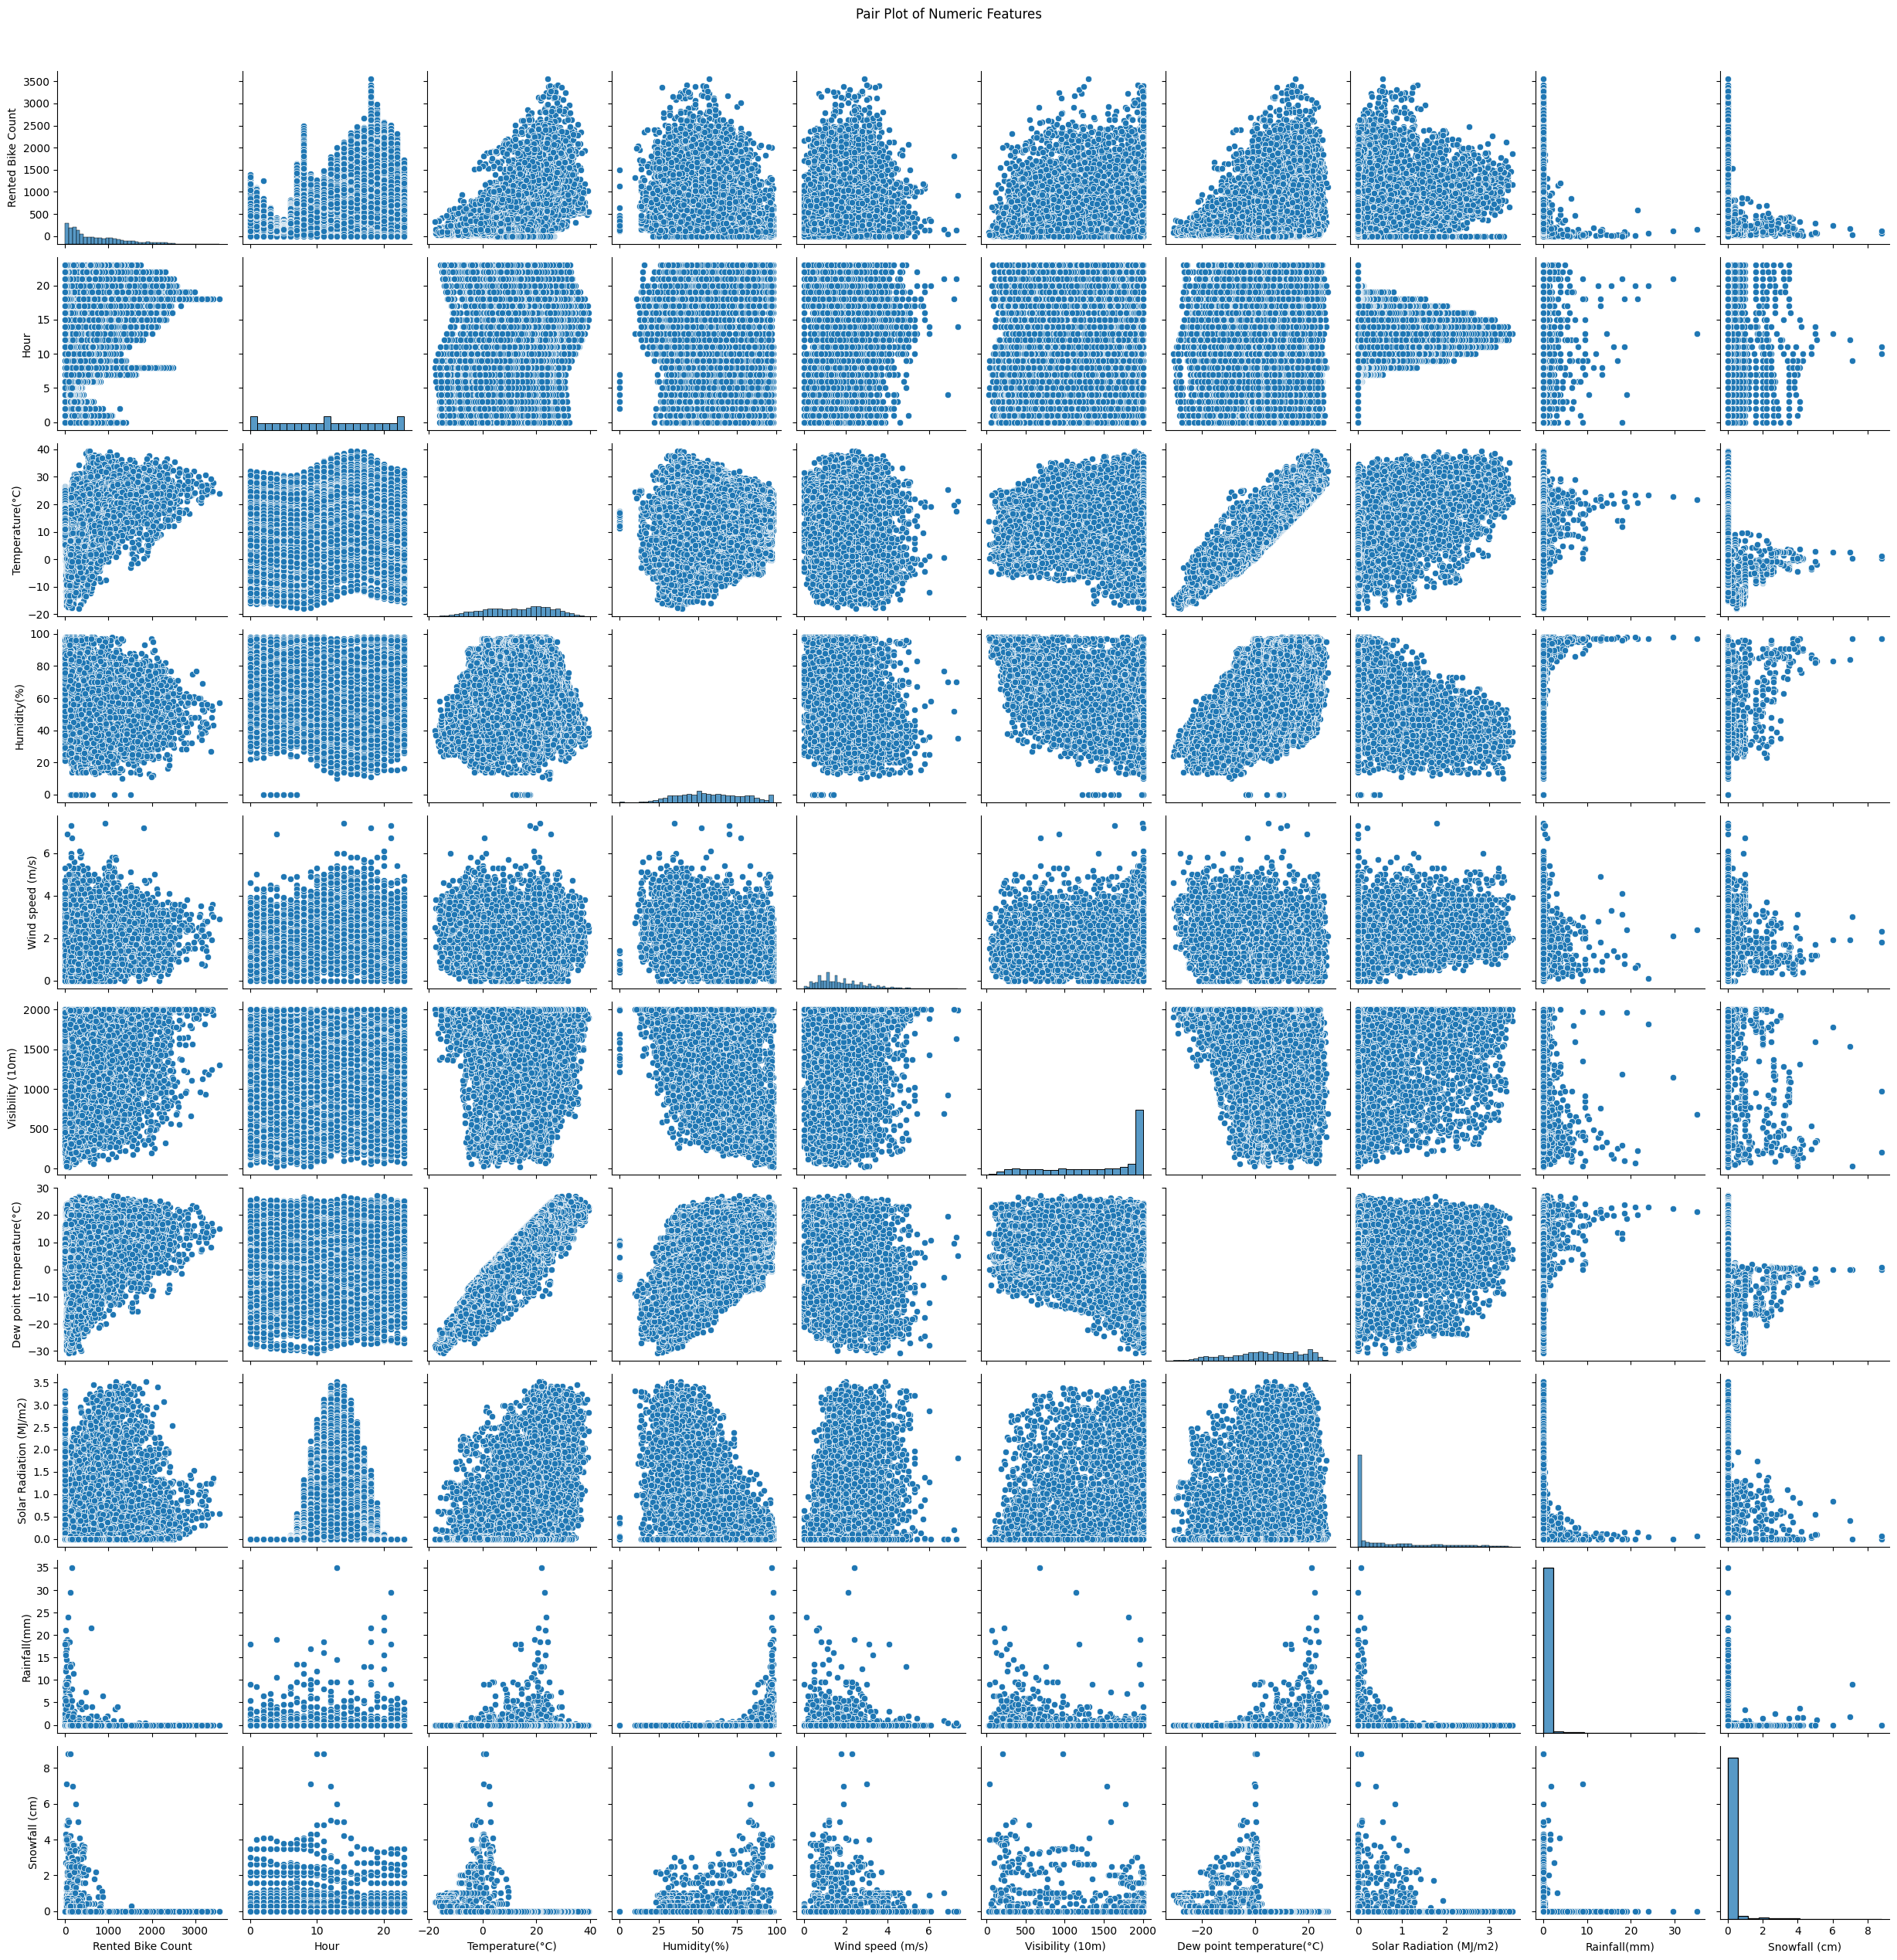

In [10]:
# Select only numeric columns
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for numerical features
correlation_matrix = numeric_features.corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.show()

# Pair plot for numerical features
sns.pairplot(numeric_features)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()


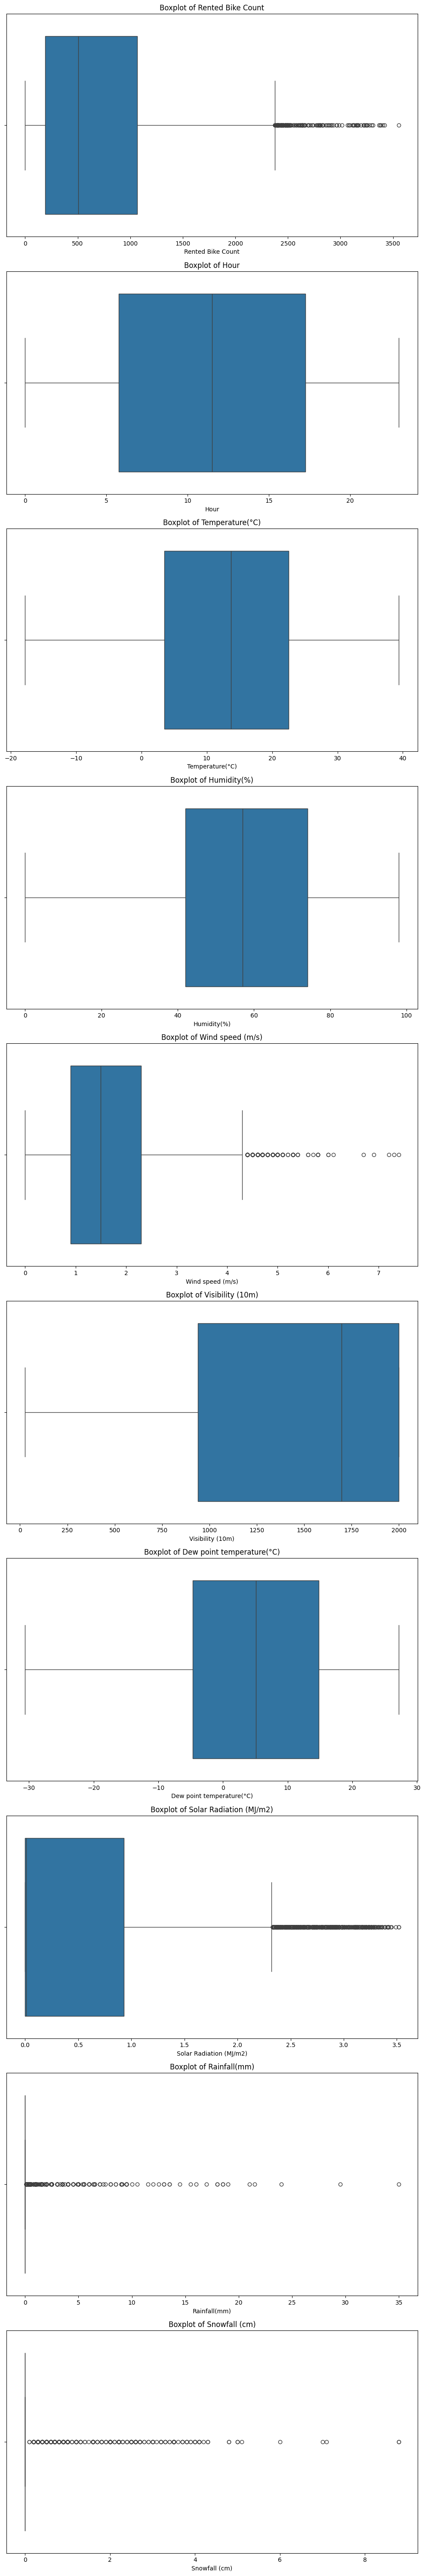

In [11]:
# Select only numeric columns
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Create separate boxplots for each numeric feature
fig, axes = plt.subplots(nrows=len(numeric_features.columns), ncols=1, figsize=(10, 6 * len(numeric_features.columns)))

for i, column in enumerate(numeric_features.columns):
    sns.boxplot(x=numeric_features[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


## **3. Data preparation (Preparação dos dados)**

Link para a sessão: [OpenAI](https://chat.openai.com/share/1857977c-e844-45a5-8dc7-fd27f13acdfb)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming your dataframe is named 'df'
# If not, replace 'df' with your actual dataframe name

# Extracting the target variable (Rented Bike Count) and features
X = df.drop(['Date', 'Rented Bike Count'], axis=1)  # Features
y = df['Rented Bike Count']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # You can choose another imputation strategy if needed
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can choose another imputation strategy if needed
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying transformations to training and testing sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


#### Obs:
As linhas abaixo foram todas geradas em apenas um prompt. Apenas separamos em células diferentes para melhor visualização.
Além disso, por não saber que estamos usando um notebook, o ChatGPT sugeriria print(df.head()), em vez de df.head(). Removemos as chamadas de "print" também para melhorar a visualização.

In [13]:
# Convert preprocessed data to Pandas DataFrame for visual inspection
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=numerical_features.tolist() +
                                       list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=numerical_features.tolist() +
                                      list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))

# Display the first few rows of the preprocessed datasets
print("X_train_preprocessed:")
X_train_preprocessed_df.head()

X_train_preprocessed:


Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0  0.505421         0.022370     0.137012          2.092940         -1.176113   
1 -0.363566         0.838222     1.359982         -0.029683         -1.472667   
2  1.084745        -0.145847    -0.596770         -0.319131         -0.930350   
3  1.664070        -1.306543     0.528362          0.259766         -0.004643   
4  1.519239         1.199888     0.724038         -0.222648         -0.707525   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                   0.130553                 0.519701     -0.134019   
1                   1.255469                 0.210677     -0.134019   
2                  -0.316331                -0.659168     -0.134019   
3                  -0.894198                -0.659168     -0.134019   
4                   1.371043                -0.659168     -0.134019   

   Snowfall (cm)  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0      -0.171026             1.0             0.0             0.0   
1      -0.171026             0.0             0.0             1.0   
2      -0.171026             1.0             0.0             0.0   
3      -0.171026             0.0             0.0             0.0   
4      -0.171026             0.0             0.0             1.0   

   Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
0             0.0              0.0                 1.0                 0.0   
1             0.0              0.0                 1.0                 0.0   
2             0.0              0.0                 1.0                 0.0   
3             1.0              0.0                 1.0                 0.0   
4             0.0              0.0                 1.0                 0.0   

   Functioning Day_Yes  
0                  1.0  
1                  1.0  
2                  1.0  
3                  1.0  
4                  1.0

In [14]:
# Feito manualmente para uso mais tarde
X_TRAIN_PREPROCESSED_COLUMNS = X_train_preprocessed_df.columns

In [15]:
print("\nX_test_preprocessed:")
X_test_preprocessed_df.head()


X_test_preprocessed:


Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0 -0.508397         1.199888     0.528362          0.066800          0.921064   
1  0.070928         1.654074    -0.352176          0.356249         -1.043401   
2  0.360590         1.771826    -0.401095         -0.512097          0.503267   
3  0.939914         0.333571    -0.547852         -0.319131          0.327956   
4 -0.653228        -0.549567    -0.352176         -0.705063         -0.063626   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                   1.301699                 0.142005     -0.134019   
1                   1.309403                 3.014783     -0.134019   
2                   1.386452                 1.263647     -0.134019   
3                   0.107439                -0.533269     -0.134019   
4                  -0.547478                -0.441707     -0.134019   

   Snowfall (cm)  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0      -0.171026             0.0             0.0             1.0   
1      -0.171026             0.0             0.0             1.0   
2      -0.171026             0.0             0.0             1.0   
3      -0.171026             1.0             0.0             0.0   
4      -0.171026             0.0             1.0             0.0   

   Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
0             0.0              0.0                 1.0                 0.0   
1             0.0              0.0                 1.0                 0.0   
2             0.0              0.0                 1.0                 0.0   
3             0.0              0.0                 1.0                 0.0   
4             0.0              0.0                 1.0                 0.0   

   Functioning Day_Yes  
0                  1.0  
1                  1.0  
2                  1.0  
3                  1.0  
4                  1.0

In [16]:
# Extract statistical features
X_train_stats = X_train_preprocessed_df.describe()
X_test_stats = X_test_preprocessed_df.describe()

In [17]:
# Display the statistical features
print("\nStatistical Features of X_train_preprocessed:")
X_train_stats


Statistical Features of X_train_preprocessed:


Hour  Temperature(°C)   Humidity(%)  Wind speed (m/s)  \
count  7.008000e+03     7.008000e+03  7.008000e+03      7.008000e+03   
mean   3.852829e-17     8.313999e-17 -1.977109e-17     -1.196405e-16   
std    1.000071e+00     1.000071e+00  1.000071e+00      1.000071e+00   
min   -1.667046e+00    -2.584992e+00 -2.847036e+00     -1.669891e+00   
25%   -7.980592e-01    -7.934818e-01 -7.924457e-01     -8.015456e-01   
50%    7.092757e-02     7.283518e-02 -5.866349e-02     -2.226485e-01   
75%    7.950832e-01     8.045787e-01  7.729564e-01      6.456971e-01   
max    1.664070e+00     2.226011e+00  1.947008e+00      5.469840e+00   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count      7.008000e+03               7.008000e+03             7.008000e+03   
mean       1.429602e-16               7.807048e-17             2.661494e-17   
std        1.000071e+00               1.000071e+00             1.000071e+00   
min       -2.300068e+00              -2.674031e+00            -6.591680e-01   
25%       -8.193470e-01              -6.630514e-01            -6.591680e-01   
50%        4.295380e-01               7.661914e-02            -6.477227e-01   
75%        9.227021e-01               8.239946e-01             4.166929e-01   
max        9.227021e-01               1.779402e+00             3.369588e+00   

       Rainfall(mm)  Snowfall (cm)  Seasons_Autumn  Seasons_Spring  \
count  7.008000e+03   7.008000e+03     7008.000000     7008.000000   
mean   8.618170e-18  -2.230585e-17        0.250143        0.255422   
std    1.000071e+00   1.000071e+00        0.433126        0.436129   
min   -1.340192e-01  -1.710264e-01        0.000000        0.000000   
25%   -1.340192e-01  -1.710264e-01        0.000000        0.000000   
50%   -1.340192e-01  -1.710264e-01        0.000000        0.000000   
75%   -1.340192e-01  -1.710264e-01        1.000000        1.000000   
max    3.266604e+01   1.932124e+01        1.000000        1.000000   

       Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  \
count     7008.000000     7008.000000      7008.000000         7008.000000   
mean         0.250285        0.244150         0.050228            0.949772   
std          0.433208        0.429612         0.218431            0.218431   
min          0.000000        0.000000         0.000000            0.000000   
25%          0.000000        0.000000         0.000000            1.000000   
50%          0.000000        0.000000         0.000000            1.000000   
75%          1.000000        0.000000         0.000000            1.000000   
max          1.000000        1.000000         1.000000            1.000000   

       Functioning Day_No  Functioning Day_Yes  
count         7008.000000          7008.000000  
mean             0.033818             0.966182  
std              0.180775             0.180775  
min              0.000000             0.000000  
25%              0.000000             1.000000  
50%              0.000000             1.000000  
75%              0.000000             1.000000  
max              1.000000             1.000000

In [18]:
print("\nStatistical Features of X_test_preprocessed:")
X_test_stats


Statistical Features of X_test_preprocessed:


Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count  1752.000000      1752.000000  1752.000000       1752.000000   
mean     -0.007440        -0.021494     0.006617         -0.028251   
std       1.012943         1.022921     0.980344          0.998938   
min      -1.667046        -2.509294    -2.847036         -1.669891   
25%      -0.942890        -0.827125    -0.743527         -0.801546   
50%      -0.073904         0.047603    -0.034204         -0.222648   
75%       0.939914         0.796168     0.724038          0.549214   
max       1.664070         2.057795     1.947008          3.926114   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count       1752.000000                1752.000000              1752.000000   
mean          -0.000066                  -0.012238                -0.039010   
std            0.983119                   1.031016                 0.970569   
min           -2.309899                  -2.566162                -0.659168   
25%           -0.798048                  -0.726617                -0.659168   
50%            0.409877                   0.068914                -0.647723   
75%            0.922702                   0.839404                 0.373773   
max            0.922702                   1.710058                 3.369588   

       Rainfall(mm)  Snowfall (cm)  Seasons_Autumn  Seasons_Spring  \
count   1752.000000    1752.000000     1752.000000     1752.000000   
mean       0.026611      -0.023737        0.246005        0.238584   
std        1.260518       0.823877        0.430804        0.426340   
min       -0.134019      -0.171026        0.000000        0.000000   
25%       -0.134019      -0.171026        0.000000        0.000000   
50%       -0.134019      -0.171026        0.000000        0.000000   
75%       -0.134019      -0.171026        0.000000        0.000000   
max       27.511743       8.910597        1.000000        1.000000   

       Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  \
count     1752.000000     1752.000000      1752.000000         1752.000000   
mean         0.259132        0.256279         0.045662            0.954338   
std          0.438284        0.436702         0.208811            0.208811   
min          0.000000        0.000000         0.000000            0.000000   
25%          0.000000        0.000000         0.000000            1.000000   
50%          0.000000        0.000000         0.000000            1.000000   
75%          1.000000        1.000000         0.000000            1.000000   
max          1.000000        1.000000         1.000000            1.000000   

       Functioning Day_No  Functioning Day_Yes  
count         1752.000000          1752.000000  
mean             0.033105             0.966895  
std              0.178962             0.178962  
min              0.000000             0.000000  
25%              0.000000             1.000000  
50%              0.000000             1.000000  
75%              0.000000             1.000000  
max              1.000000             1.000000

## **4. Modeling**

Link para a sessão: [OpenAI](https://chat.openai.com/share/a5cc3c9d-8ef1-4003-b2f7-20fdc2d983b4)

#### Observação:

Substituímos as variáveis abaixo, pois havia informado o nome errado no prompt:  
X_train => X_train_preprocessed  
X_test => X_test_preprocessed

In [19]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define a function to train and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate the model
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    return train_rmse, test_rmse

# Linear Regression
linear_reg = LinearRegression()
linear_reg_train_rmse, linear_reg_test_rmse = train_and_evaluate(linear_reg, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print(f"Linear Regression - Train RMSE: {linear_reg_train_rmse:.2f}, Test RMSE: {linear_reg_test_rmse:.2f}")

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg_train_rmse, ridge_reg_test_rmse = train_and_evaluate(ridge_reg, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print(f"Ridge Regression - Train RMSE: {ridge_reg_train_rmse:.2f}, Test RMSE: {ridge_reg_test_rmse:.2f}")

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg_train_rmse, lasso_reg_test_rmse = train_and_evaluate(lasso_reg, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print(f"Lasso Regression - Train RMSE: {lasso_reg_train_rmse:.2f}, Test RMSE: {lasso_reg_test_rmse:.2f}")

# Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_train_rmse, random_forest_test_rmse = train_and_evaluate(random_forest, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print(f"Random Forest - Train RMSE: {random_forest_train_rmse:.2f}, Test RMSE: {random_forest_test_rmse:.2f}")

# Gradient Boosting
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting_train_rmse, gradient_boosting_test_rmse = train_and_evaluate(gradient_boosting, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print(f"Gradient Boosting - Train RMSE: {gradient_boosting_train_rmse:.2f}, Test RMSE: {gradient_boosting_test_rmse:.2f}")

# Support Vector Regression
svr = SVR(kernel='linear')
svr_train_rmse, svr_test_rmse = train_and_evaluate(svr, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print(f"SVR - Train RMSE: {svr_train_rmse:.2f}, Test RMSE: {svr_test_rmse:.2f}")


Linear Regression - Train RMSE: 430.43, Test RMSE: 440.78
Ridge Regression - Train RMSE: 430.43, Test RMSE: 440.77
Lasso Regression - Train RMSE: 430.43, Test RMSE: 440.76
Random Forest - Train RMSE: 84.70, Test RMSE: 239.20
Gradient Boosting - Train RMSE: 243.00, Test RMSE: 270.00
SVR - Train RMSE: 458.96, Test RMSE: 464.60


In [20]:
poly_svr = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)
poly_svr_train_rmse, poly_svr_test_rmse = train_and_evaluate(poly_svr, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print(f"Polynomial SVR - Train RMSE: {poly_svr_train_rmse:.2f}, Test RMSE: {poly_svr_test_rmse:.2f}")

Polynomial SVR - Train RMSE: 567.40, Test RMSE: 568.71


In [21]:
rbf_svr = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)
rbf_svr_train_rmse, rbf_svr_test_rmse = train_and_evaluate(rbf_svr, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print(f"RBF SVR - Train RMSE: {rbf_svr_train_rmse:.2f}, Test RMSE: {rbf_svr_test_rmse:.2f}")

RBF SVR - Train RMSE: 513.00, Test RMSE: 519.38


In [22]:
sigmoid_svr = SVR(kernel='sigmoid', C=1.0, gamma='scale', epsilon=0.1)
sigmoid_svr_train_rmse, sigmoid_svr_test_rmse = train_and_evaluate(sigmoid_svr, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
print(f"Sigmoid SVR - Train RMSE: {sigmoid_svr_train_rmse:.2f}, Test RMSE: {sigmoid_svr_test_rmse:.2f}")

Sigmoid SVR - Train RMSE: 527.45, Test RMSE: 529.29


## **5. Evaluation**

Link para a sessão: [OpenAI](https://chat.openai.com/share/a06ba01e-223f-4286-90fc-6cb32a844191)

Mean Squared Error (MSE): 57218.250557534244
Mean Absolute Error (MAE): 144.3954908675799
R-squared (R2): 0.8626694654145067


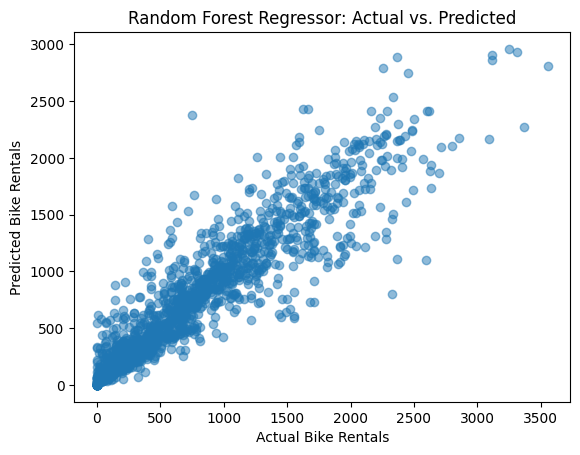

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming your RandomForestRegressor model is named "random_forest"
# Make predictions on the test set
y_pred = random_forest.predict(X_test_preprocessed)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs. Predicted')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.show()


Feature Importance:
                      Feature  Importance
1             Temperature(°C)    0.310962
0                        Hour    0.282724
6     Solar Radiation (MJ/m2)    0.095383
2                 Humidity(%)    0.070034
16        Functioning Day_Yes    0.051291
7                Rainfall(mm)    0.042749
15         Functioning Day_No    0.037625
5   Dew point temperature(°C)    0.033318
4            Visibility (10m)    0.019047
3            Wind speed (m/s)    0.018635
9              Seasons_Autumn    0.016704
12             Seasons_Winter    0.012055
10             Seasons_Spring    0.004276
11             Seasons_Summer    0.002124
14         Holiday_No Holiday    0.001281
13            Holiday_Holiday    0.001211
8               Snowfall (cm)    0.000581


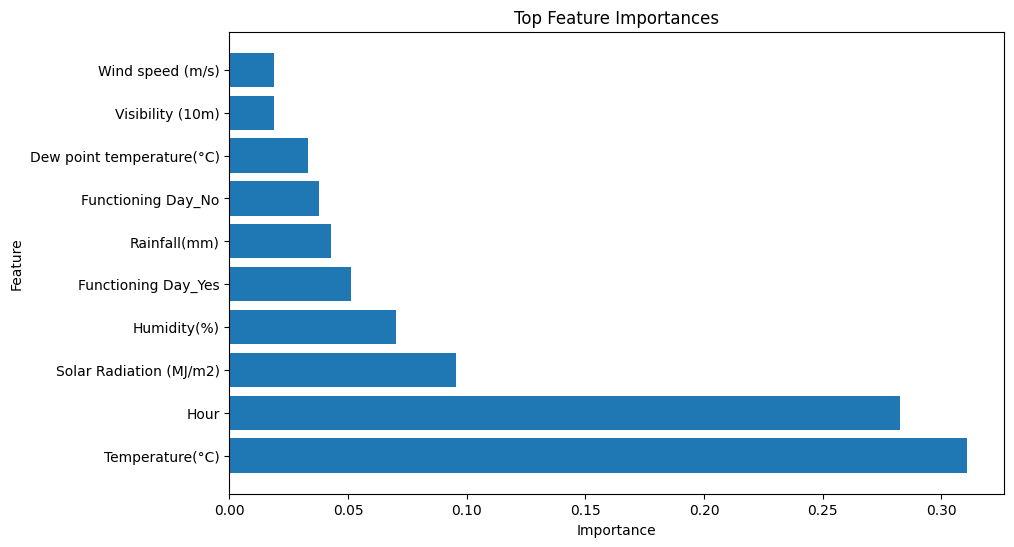

In [24]:
# Extract feature importances from the trained Random Forest model
feature_importances = random_forest.feature_importances_

# Get the feature names from the preprocessed dataset
feature_names = X_TRAIN_PREPROCESSED_COLUMNS # obtido manualmente antes no código

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importance:")
print(feature_importance_df)

# Plot the top N important features
top_n = 10  # You can adjust this number based on your preference
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.title('Top Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


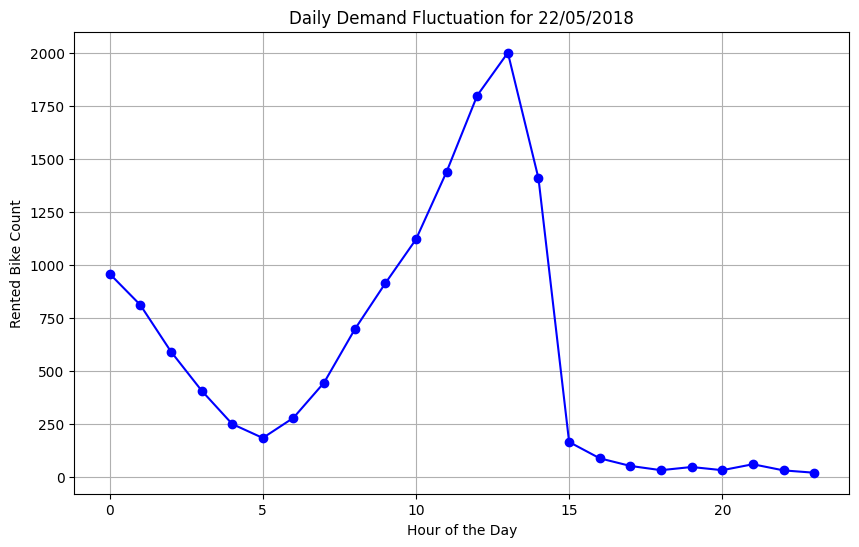

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_daily_demand(df):
    # Randomly sample a day from the "Date" column
    random_day = df['Date'].sample(n=1).values[0]

    # Filter the dataframe for the selected day
    selected_day_df = df[df['Date'] == random_day]

    # Plot "Rented Bike Count" versus "Hour"
    plt.figure(figsize=(10, 6))
    plt.plot(selected_day_df['Hour'], selected_day_df['Rented Bike Count'], marker='o', linestyle='-', color='b')
    plt.title(f'Daily Demand Fluctuation for {random_day}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Rented Bike Count')
    plt.grid(True)
    plt.show()

# Assuming your dataframe is named "df"
plot_daily_demand(df)


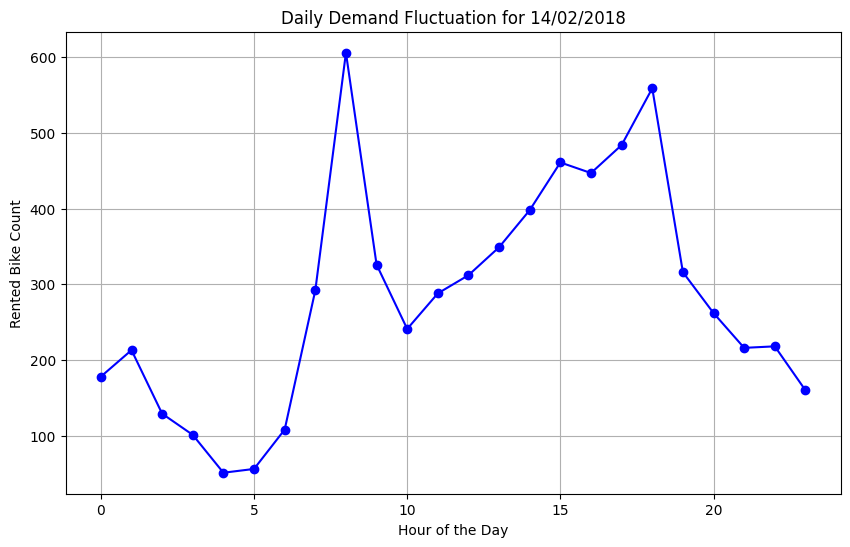

In [26]:
plot_daily_demand(df)

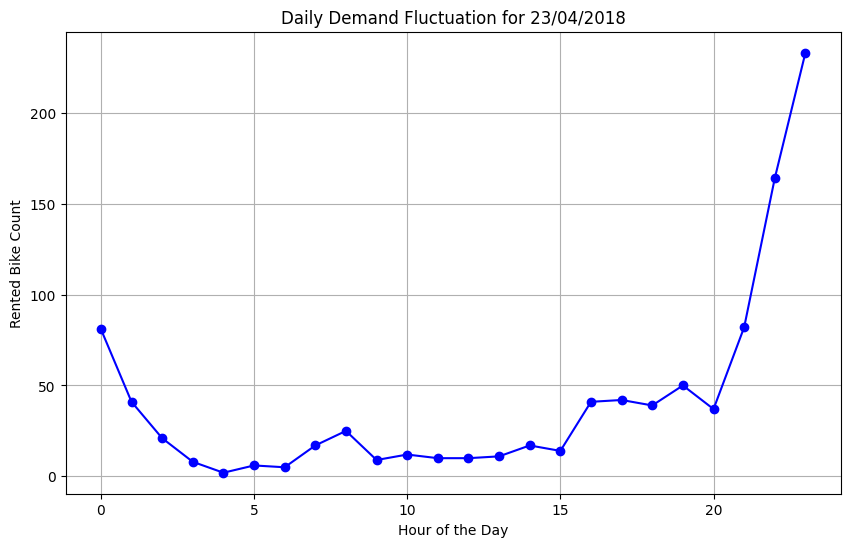

In [27]:
plot_daily_demand(df)

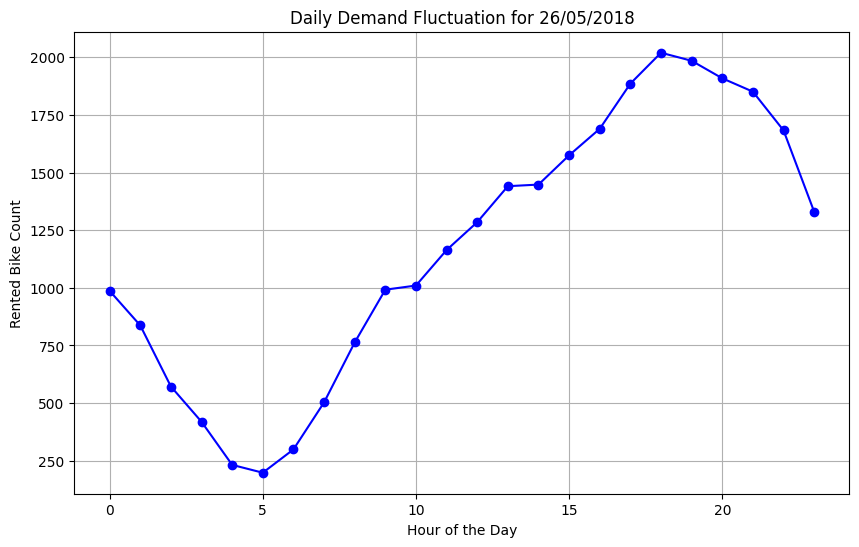

In [28]:
plot_daily_demand(df)

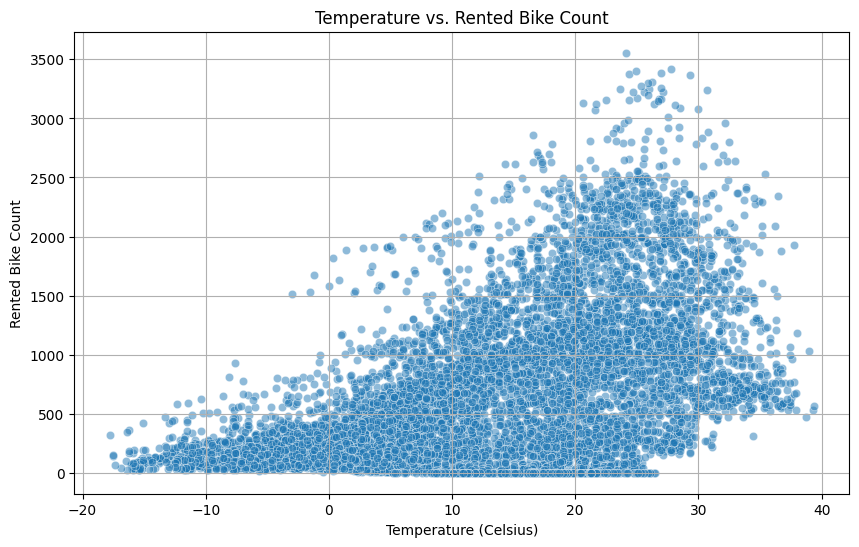

In [29]:
import seaborn as sns

# Corrigi a variavel Temperature por Temperature(°C)

def plot_temperature_relationship(df):
    # Scatter plot of "Temperature" versus "Rented Bike Count"
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df, alpha=0.5)
    plt.title('Temperature vs. Rented Bike Count')
    plt.xlabel('Temperature (Celsius)')
    plt.ylabel('Rented Bike Count')
    plt.grid(True)
    plt.show()

# Assuming your dataframe is named "df"
plot_temperature_relationship(df)

/tmp/ipykernel_26765/953897376.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Occurrence Count'] = df.groupby('Temperature Binned')['Temperature Binned'].transform('count')
/tmp/ipykernel_26765/953897376.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Temperature Binned', y='Rented Bike Count', size='Occurrence Count', data=df, alpha=0.7, sizes=(20, 200), palette='viridis', edgecolor='w')


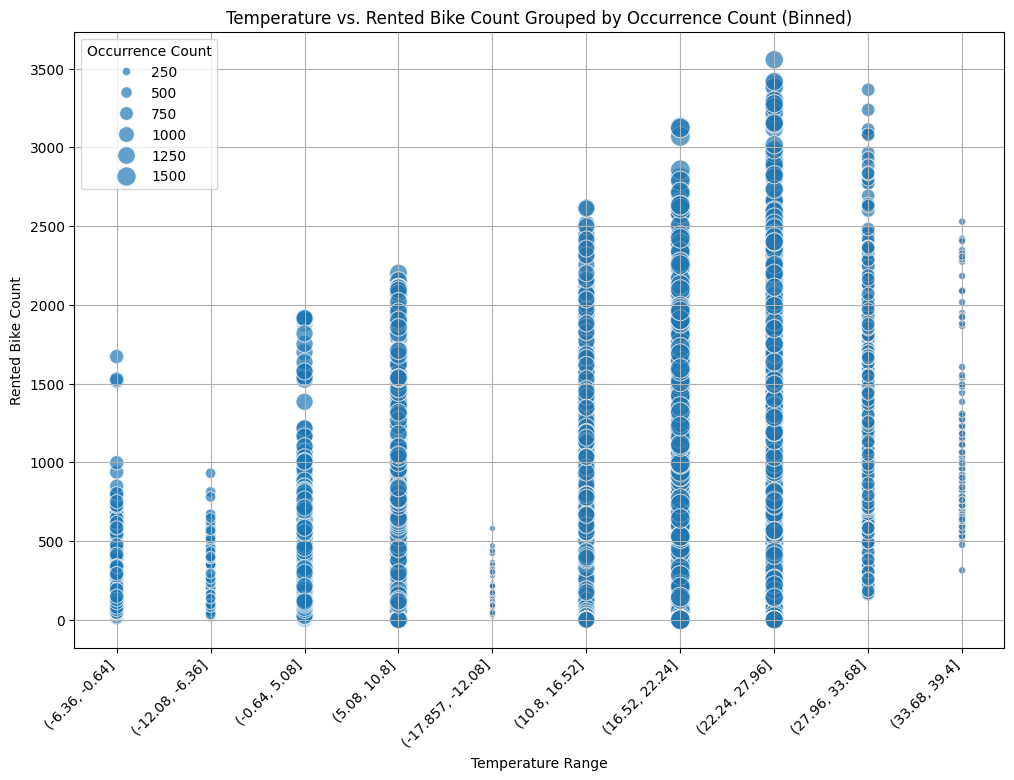

In [30]:
import pandas as pd
import seaborn as sns

def plot_temperature_relationship_grouped_by_quantity_binned(df, num_bins=10):
    # Ensure "Temperature" column is numeric
    df['Temperature'] = pd.to_numeric(df['Temperature(°C)'], errors='coerce')

    # Create bins for temperature ranges
    df['Temperature Binned'] = pd.cut(df['Temperature(°C)'], bins=num_bins)

    # Create a new column for the quantity of occurrences
    df['Occurrence Count'] = df.groupby('Temperature Binned')['Temperature Binned'].transform('count')

    # Convert "Temperature Binned" to string for seaborn compatibility
    df['Temperature Binned'] = df['Temperature Binned'].astype(str)

    # Scatter plot of "Temperature" versus "Rented Bike Count" with grouping by quantity
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Temperature Binned', y='Rented Bike Count', size='Occurrence Count', data=df, alpha=0.7, sizes=(20, 200), palette='viridis', edgecolor='w')
    plt.title(f'Temperature vs. Rented Bike Count Grouped by Occurrence Count (Binned)')
    plt.xlabel('Temperature Range')
    plt.ylabel('Rented Bike Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

# Assuming your dataframe is named "df"
plot_temperature_relationship_grouped_by_quantity_binned(df, num_bins=10)
